# Progetto di Metodi Informatici per la Gestione Aziendale

## Progetto base

In [1]:
#!pip install pandas
import pandas as pd
import os

Importazione del dataset delle review:

In [2]:
import json

data = []
pwd = os.getcwd()
if "Richard" in pwd:
    file_path = '/Users/Richard/Desktop/Books.json'
else:
    file_path = '/Users/susannamau/Dev/metodi_informatici/Books.jsonl'
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i == 1000:
            break
        data.append(json.loads(line))

In [3]:
data[1:2]

[{'rating': 5.0,
  'title': 'Updated: after 1st arrived damaged this one is perfect',
  'text': 'Updated: after first book arrived very damaged the replacement arrived in perfect condition.',
  'images': [],
  'asin': '0593235657',
  'parent_asin': '0593235657',
  'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ',
  'timestamp': 1640629604904,
  'helpful_vote': 1,
  'verified_purchase': True}]

### 1. Analisi esplorativa (statistiche descrittive, analisi correlazione)
To perform an exploratory analysis on this dataset, we perform the following steps:

* Trasformazione del dataset in un dataframe Pandas,
* Controllo delle informazioni di base del dataframe come il numero di righe, di colonne e i tipi delle variabili,
* Controllo dei valori mancanti,
* Statistiche descrittive delle variabili numeriche (rating e helpful_vote),
* Visualizzazione dei dati.

Trasformazione in un dataframe Pandas:

In [ ]:
df = pd.DataFrame(data)
df.head()
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not a watercolor book! Seems like copies imo.,It is definitely not a watercolor book. The p...,[{'small_image_url': 'https://m.media-amazon.c...,B09BGPFTDB,B09BGPFTDB,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1642399598485,0,True
1,5.0,Updated: after 1st arrived damaged this one is...,Updated: after first book arrived very damaged...,[],0593235657,0593235657,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640629604904,1,True
2,5.0,Excellent! I love it!,I bought it for the bag on the front so it pai...,[],1782490671,1782490671,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640383495102,0,True
3,5.0,Updated after 1st arrived damaged. Excellent,Updated: after 1st arrived damaged the replace...,[],0593138228,0593138228,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640364906602,0,False
4,5.0,Beautiful patterns!,I love this book! The patterns are lovely. I ...,[{'small_image_url': 'https://m.media-amazon.c...,0823098079,0823098079,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1637312253230,0,True
...,...,...,...,...,...,...,...,...,...,...
995,5.0,A feast for body and soul,"Based on Jan Karon's Mitford series, the Mitfo...",[],B0017HZ0Y6,0670032395,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245504975000,16,True
996,5.0,"A beautiful, heartbreaking look at love and lo...","Mahbod Seraji's haunting ""Rooftops of Tehran"" ...",[],045122681X,045122681X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245501300000,3,False
997,3.0,"A fleeting, delicate tale as light as rosewater","In ""Rosewater and Soda Bread,"" Marsha Mehran's...",[],081297249X,081297249X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245111599000,2,False
998,5.0,"Hip, quirky, romantic tale of film noir",Ever felt like there's a nagging voice in your...,[],0425218384,0425218384,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1244860930000,1,False


Ho importato le prime 1000 righe perché il file intero era troppo pesante. Ci sono 10 colonne che rappresentano:
 * Rating (float): rating of the product (from 1.0 to 5.0). It will be transformed in a categorical variable,
* Title	(str) : title of the user review,
* Text (str): text body of the user review,
* Images (list): images that users post after they have received the product. Each image has different sizes (small, medium, large), represented by the small_image_url, medium_image_url, and large_image_url respectively,
* asin (str): ID of the product,
* parent_asin (str): parent ID of the product,
* user_id (str): ID of the reviewer,
* timestamp (int): time of the review (unix time),
* verified_purchase (boolean): user purchase verification,
* helpful_vote (int): helpful votes of the review.

In [ ]:
df['rating'] = df['rating'].astype('int')

NameError: name 'df' is not defined

Alcune statistiche descrittive delle variabili numeriche del dataset. Le statistiche descrittive su timestamp sono poco informative a causa della natura della variabile.

In [ ]:
df.describe()

,rating,timestamp,helpful_vote
count,1000.000000,1.000000e+03,1000.000000
mean,4.477000,1.477203e+12,4.032000
std,0.948879,1.116759e+11,15.863563
min,1.000000,1.129661e+12,0.000000
25%,4.000000,1.403895e+12,0.000000
50%,5.000000,1.480937e+12,0.000000
75%,5.000000,1.561830e+12,2.000000
max,5.000000,1.678065e+12,330.000000


Mentre la variabile rating è molto sbilanciata verso sinistra (più della metà delle osservazioni hanno rating 5), la variabile helpful_vote è molto sbilanciata verso destra (più della metà delle osservazioni hanno valore 0).

Conteggio di quante reviews ci sono per ogni codice prodotto (asin) e del rating medio:

In [ ]:
df_grouped = df.groupby('asin').agg(number_of_reviews = pd.NamedAgg(column='asin', aggfunc='count'),
                                    average_rating = pd.NamedAgg(column='rating', aggfunc='mean')).sort_values(by='number_of_reviews', ascending=False)
df_grouped.head()

,number_of_reviews,average_rating
asin,,
1741799953,2,4.0
0547636474,2,4.5
1454710179,2,5.0
B00K7MCE3C,2,4.5
1578563232,2,5.0


Conteggio dei valori mancanti:

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


Nelle osservazioni importate non ci sono valori mancanti.

Visualizzazione della distribuzione dei ratings:

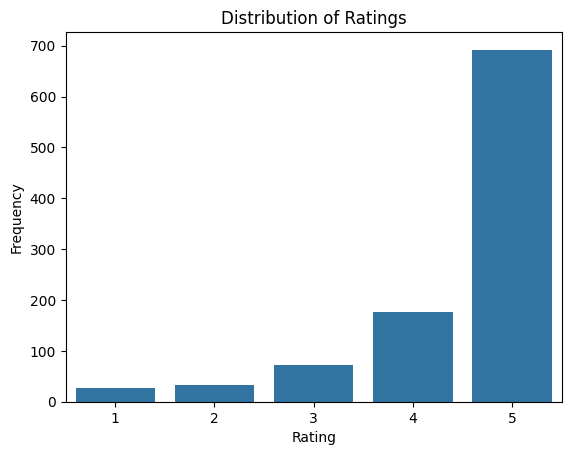

In [ ]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

La distribuzione dei ratings è asimmetrica negativa: le osservazioni con rating 5 sono molto più frequenti di quelle con punteggi inferiori.

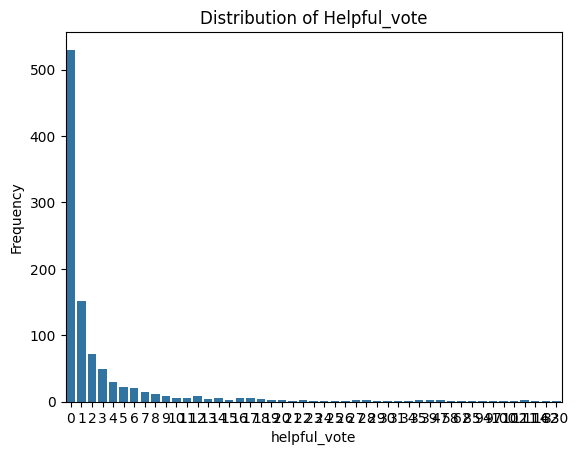

In [ ]:
sns.countplot(x='helpful_vote', data=df)
plt.title('Distribution of Helpful_vote')
plt.xlabel('helpful_vote')
plt.ylabel('Frequency')
plt.show()

La distribuzione è asimmetrica positiva, con uno sbilanciamento importante verso destra.

### 2. Identificazione della configurazione ottimale dell’algoritmo K-NN per la predizione dei rating
In questo punto dovranno quindi essere testate le diverse combinazioni: similarità, valore di K, user/item based. Tramite le diverse metriche di performance (MSE e RMSE) individuare di conseguenza la configurazione ottimale.

In [ ]:
#!pip install surprise
#!pip install scikit-learn
from surprise import KNNBasic, Dataset, Reader
from sklearn.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)
#scoring = {"MAE": "neg_mean_absolute_error", "RMSE": 'neg_root_mean_squared_error', "MSE": "neg_mean_squared_error"}

param_grid = {'k': [10, 20, 30, 40, 50],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'user_based': [True, False]}}

# Assuming 'df' is your DataFrame and it has columns 'user_id', 'asin' (for item id), and 'rating'
gs = GridSearchCV(KNNBasic, param_grid, scoring="neg_mean_squared_error", cv=5)
gs.fit(data)

TypeError: Singleton array array(<surprise.trainset.Trainset object at 0x16b9ab220>, dtype=object) cannot be considered a valid collection.

### 3. Filling della matrice di rating con la configurazione ottimale

### 4. Segmentazione degli utenti in base alle preferenze
Algoritmo di clustering K-MEANS con cosine similarity.

### 5. Creazione per ogni utente della lista degli n items (top k items) da consigliare
(es. considerando il rating predetto)

### 6. Filling della matrice di rating attraverso Matrix Factorization in aggiunta a K-NN e confronto dei risultati ottenuti in termini di MSE e RMSE